<a href="https://colab.research.google.com/github/juanmanuelvillacis/lab-regression-analysis/blob/master/your_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab: Regression Analysis

In [ ]:
import pandas as pd
import pylab as plt 
from scipy import stats
from scipy.stats import linregress
import matplotlib.pyplot as plt
import numpy as np

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [ ]:
# Your code here. 
student_data = pd.DataFrame({'X': [17,51,27,21,36,48,19,26,54,30], 'Y': [10,1,5,9,4,2,9,6,0,3]})
student_data

Draw a dispersion diagram (scatter plot) for the data.

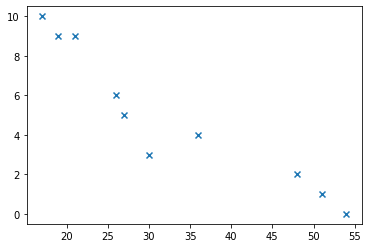

In [ ]:
# Your code here.
plt.scatter(student_data['X'], student_data['Y'], marker='x');

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
# Your response here. 
'''
The hypothesis can be the younger the student the latest he arrives
'''

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [ ]:
# Your response here.
student_data.corr(),student_data.cov()
'''
The correlation beween the values is high having a inverse correlation.
'''

(          X         Y
 X  1.000000 -0.939163
 Y -0.939163  1.000000,             X          Y
 X  187.655556 -45.566667
 Y  -45.566667  12.544444)

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [ ]:
# Your response here.
x = student_data['X']
y = student_data['Y']
linreg = linregress(x, y)
linreg
'''
The outcome variable is the slope of the line, the x value of the intercept with the y axis, a pvalue that shows the relation between the two variables
in this case we are using the linear regression
'''

LinregressResult(slope=-0.2428207709159808, intercept=12.888803363135768, rvalue=-0.9391626886887121, pvalue=5.56665383455343e-05, stderr=0.03139728816158607)

Plot your regression model on your scatter plot.

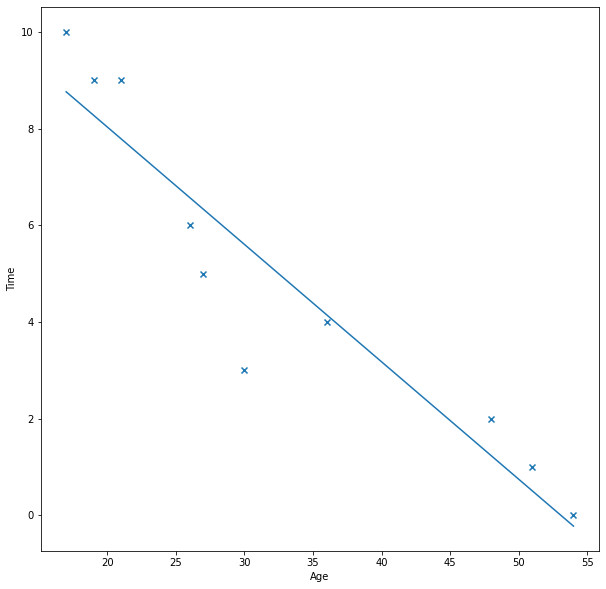

In [ ]:
# Your code here.

x_ = np.linspace(x.min(), x.max(), num=50)

y_ = linreg[0]*x_+linreg[1] # m*x+b

plt.figure(figsize=(10, 10))
plt.plot(x_, y_)
plt.scatter(x, y, marker='x')
plt.xlabel('Age')
plt.ylabel('Time');


Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [ ]:
# Your response here. 
'''
The conclution is that the variables have a inverse relation with a high correlation between them. 
This means that the higher the age of the student, the fewer probabilities of arriving late to class
'''

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [ ]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('/content/drive/MyDrive/Iron Hack/LABs/csv_docs/vehicles.csv')
vehicles

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [ ]:
vehicles.columns
short = vehicles[['Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year','CO2 Emission Grams/Mile']]
short

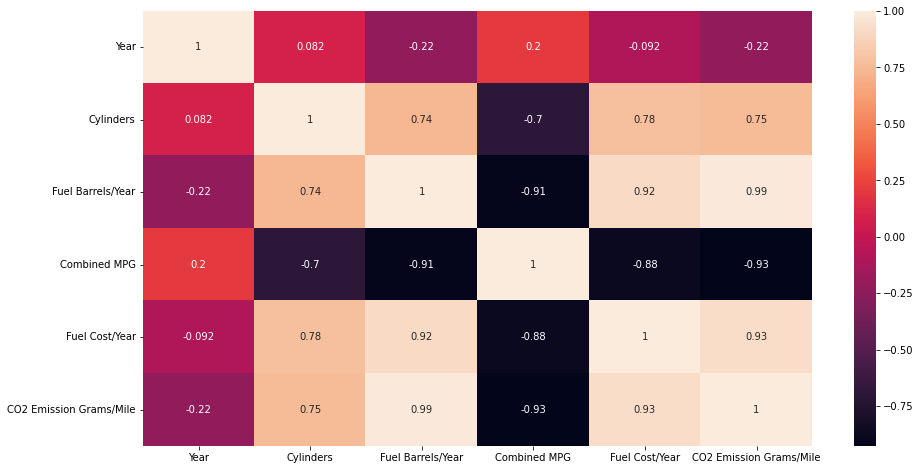

In [ ]:
# Your response here. 
plt.subplots(figsize=(15,8))
sns.heatmap(short.corr(), annot=True);
'''
The variables that have correlation with the CO2 emisison are Fuel Barrels/Year, Combined MPG and Cylinders
The lease amount of information is the Year
'''

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [ ]:
import statsmodels.api as sm
import seaborn as sn

In [ ]:
# Your response here. 
x = sm.add_constant(short[[
          'Fuel Barrels/Year',
          'Cylinders',
          'Combined MPG',
          'Fuel Cost/Year',
          'Year'
    ]])

y = short['CO2 Emission Grams/Mile']

In [ ]:
modelo = sm.OLS(y, x).fit()
print(modelo.summary())

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Thu, 30 Sep 2021   Prob (F-statistic):               0.00
Time:                             19:29:06   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your response here. 

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [ ]:
# Your code here. 
party = pd.DataFrame({'X':[1,3,4,6,8,9,11,14],'Y':[1,2,4,4,5,7,8,13]})
party

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [ ]:
y = party['Y']

x = party['X']

linreg = linregress(x, y)
linreg

LinregressResult(slope=0.8484848484848485, intercept=-0.43939393939393945, rvalue=0.9652303546573691, pvalue=0.00010236374464090686, stderr=0.09380896778286217)

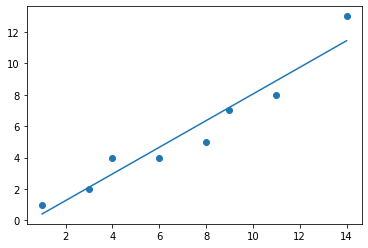

In [ ]:
# Your code here.
x_ = np.linspace(x.min(), x.max(), num=50)

y_ = linreg[0]*x_+linreg[1] # m*x+b
plt.plot(x_, y_)
plt.scatter(party['X'],party['Y']);

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
# Your response here. 
'''
The linaer regretioon tell us that the variables have a positive reltaion with high correlation
'''

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

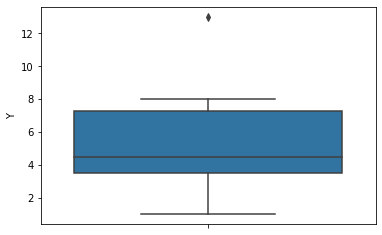

In [ ]:
# Your response here. 
#plt.boxplot(party['Y'])
sns.boxplot(data=party,y='Y');
#plt.boxplot(x=party['X'],y);

In [ ]:
party.drop(labels=7,axis=0,inplace=True)
party

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8


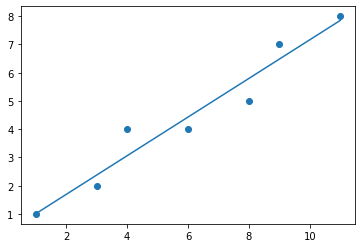

In [ ]:
y = party['Y']

x = party['X']

linreg = linregress(x, y)

# Your code here.
x_ = np.linspace(x.min(), x.max(), num=50)

y_ = linreg[0]*x_+linreg[1] # m*x+b
plt.plot(x_, y_)
plt.scatter(party['X'],party['Y']);

In [ ]:
linreg


LinregressResult(slope=0.6842105263157895, intercept=0.32330827067669166, rvalue=0.971278116825086, pvalue=0.0002644056885656864, stderr=0.07496206665031292)

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 
LinregressResult(slope=0.8484848484848485, intercept=-0.43939393939393945, rvalue=0.9652303546573691, pvalue=0.00010236374464090686, stderr=0.09380896778286217)
'''
The slope have a more positive value, the intercept changed it position and the p value has a value closer to 0
'''